In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.EnvironmentNonStationary import EnvironmentNonStationary
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.UCBLearnerActive import UCBLearnerActive, UCBLearnerActive2
from Code.UCBLearnerSlidingWindow import UCBLearnerSlidingWindow

%matplotlib inline

In [2]:
cust_json = "customer3_n_s.json"
today_customer = 300
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2_sparse.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   ] 87.9%
loading: [===========================   ] 88.9%
loading: [===========================   ] 89.8%
loading: [============================  ] 90.8%
loading: [============================  ] 91.8%
loading: [============================  

In [3]:
n_arms = 4
n_products = 5 

feature1 = 0
feature2 = 0

customer = Customer(feature1, feature2)

TIME_HORIZON = 300
NUM_ITERATION = 5

In [4]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

## UCB with abrupt change detection 1

in this case when an abrupt change is detected for a single arm, all the data are dropped

In [5]:
rewards_iterations1 = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations1.append(np.array(rewards))
    environment.new_iteration()
print(ucb6_learner.get_conv_rate_history())
rewards_iterations1 = np.array(rewards_iterations1)
rewards_iterations1.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 1]
[0, 0, 0, 1, 0]
[2, 1, 2, 0, 2]
[2, 3, 1, 1, 2]
[2, 1, 2, 1, 2]
[3, 3, 3, 3, 1]
[2, 3, 1, 0, 3]
[2, 0, 2, 2, 2]
loading: [=                             ] 3.3%
[2, 1, 1, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 1]
[2, 1, 0, 1, 0]
[2, 1, 1, 3, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 1]
loading: [==                            ] 6.7%
[2, 1, 3, 1, 2]
[2, 3, 1, 1, 2]
[2, 2, 1, 0, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 1]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 3]
[2, 1, 1, 1, 2]
loading: [===                           ] 10.0%
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 2, 2]
[2, 1, 1, 1, 2]
loading: [====                          ] 13.3%
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 

[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 0]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[3, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [==========                    ] 33.3%
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 0, 2]
[2, 1, 1, 1, 2]
[2, 2, 3, 1, 2]
loading: [===========                   ] 36.7%
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 0, 2]
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 2, 2, 1, 2]
[2, 1, 1, 0, 2]
[2, 3, 3, 1, 2]
[2, 1, 1, 1, 2]
loading: [============                  ] 40.0%
[2, 1, 1, 2, 2]
[2, 0, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 3, 2, 2]
[2, 1, 1, 1, 2]
[2, 2, 2, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 3, 1]
[1, 2, 1, 1, 2]
loading: [=============                 ] 43.3%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 1, 0, 2]
[2, 1, 1, 1, 3]
[2, 2, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
loading: [==============

[2, 3, 2, 0, 2]
[2, 2, 2, 0, 2]
[2, 2, 3, 1, 2]
[2, 2, 3, 0, 2]
[2, 0, 1, 2, 2]
loading: [===================           ] 63.3%
[2, 2, 2, 0, 2]
[2, 1, 3, 3, 2]
[2, 2, 3, 1, 2]
[1, 2, 1, 0, 2]
[2, 2, 3, 0, 2]
[2, 2, 2, 0, 2]
[2, 2, 3, 0, 2]
[2, 2, 3, 0, 2]
[2, 2, 2, 0, 2]
[2, 2, 2, 0, 2]
loading: [====================          ] 66.7%
[2, 2, 3, 0, 3]
[2, 2, 3, 2, 2]
[2, 2, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 0]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
abrupt change
[3, 3, 2, 3, 3]
[1, 2, 1, 2, 1]
loading: [=====================         ] 70.0%
[0, 0, 0, 1, 0]
[2, 1, 3, 0, 2]
[2, 1, 3, 1, 2]
[3, 3, 3, 1, 3]
[2, 1, 2, 1, 1]
[2, 1, 3, 1, 0]
[2, 1, 3, 1, 2]
[2, 2, 3, 2, 2]
[3, 1, 3, 3, 2]
[2, 1, 3, 1, 2]
loading: [======================        ] 73.3%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 3]
[2, 1, 3, 0, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 0, 3, 1, 2]
[2, 3, 3, 1, 1]
[2, 1, 2, 1, 2]
loading: [=======================       ] 76.7%
[2, 1, 3, 1, 2]
[2, 1, 3, 

[2, 1, 3, 2, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
loading: [============================  ] 93.3%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
loading: [============================= ] 96.7%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
Iteration # 5
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[2, 3, 1, 1, 2]
[2, 1, 2, 1, 1]
[2, 3, 1, 3, 2]
[2, 1, 2, 1, 3]
[2, 2, 1, 1, 2]
[3, 1, 1, 1, 2]
loading: [=                             ] 3.3%
[2, 3, 1, 1, 1]
[2, 1, 3, 2, 2]
[2, 0, 1, 1, 0]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 1]
[2, 1, 1, 1, 2]
[2, 1, 0, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 2, 0, 1]
[2, 1, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 1, 1, 1, 3]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 

(5, 300)

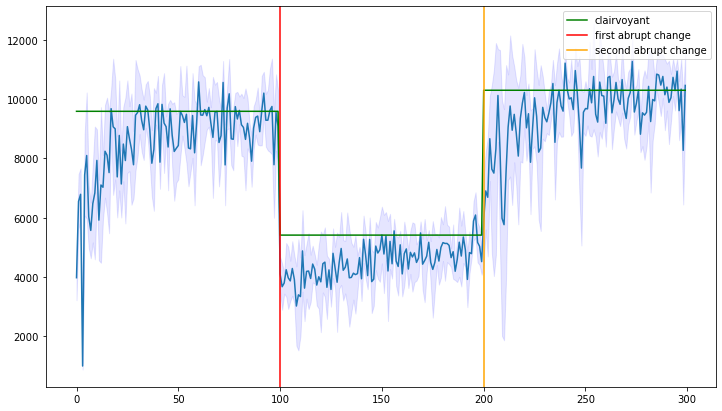

In [6]:
plt.figure(figsize=(12, 7))
mean1 = np.mean(rewards_iterations1, axis=0)
stdev1 = np.std(rewards_iterations1, axis=0)


plt.plot(range(len(mean1)), mean1)
plt.fill_between(range(len(mean1)), (mean1-stdev1), (mean1+stdev1), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c, color="green", label="clairvoyant")
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

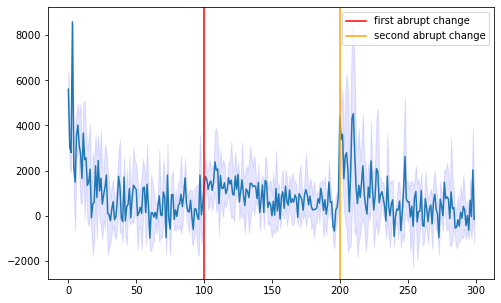

In [7]:
plt.figure(figsize=(8,5))
regret1 = rews_c - rewards_iterations1 
mean_regret1 = np.mean(regret1, axis=0)
std_regret1 = np.std(regret1, axis=0)

plt.plot(range(len(mean_regret1)), mean_regret1)
plt.fill_between(range(len(mean_regret1)), (mean_regret1-std_regret1), (mean_regret1+std_regret1), color='b', alpha=.1)
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

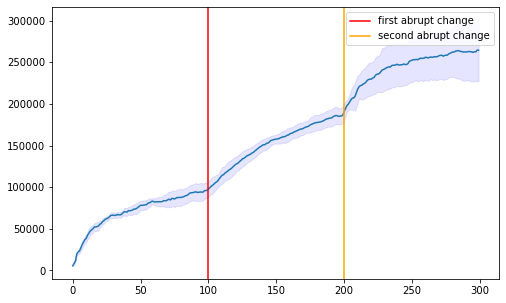

In [8]:
plt.figure(figsize=(8,5))
regret1 = rews_c - rewards_iterations1 
cumulative_regret1 = np.cumsum(regret1, axis=1)
cum_reg_mean1 = np.mean(cumulative_regret1, axis=0)
cum_reg_std1 = np.std(cumulative_regret1, axis=0)

plt.plot(range(len(cum_reg_mean1)), cum_reg_mean1)
plt.fill_between(range(len(cum_reg_mean1)), (cum_reg_mean1-cum_reg_std1), (cum_reg_mean1+cum_reg_std1), color='b', alpha=.1)
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

## UCB with abrupt change detection 2

in this case when an abrupt change is detected for a single arm, only the data reletad to that arm are dropped

In [5]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

In [6]:
rewards_iterations2 = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerActive2(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations2.append(np.array(rewards))
    environment.new_iteration()
rewards_iterations2 = np.array(rewards_iterations2)
rewards_iterations2.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[2, 3, 1, 1, 2]
[2, 1, 2, 0, 2]
[3, 1, 3, 1, 3]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 1]
[2, 1, 2, 1, 0]
loading: [=                             ] 3.3%
[2, 2, 0, 2, 2]
[2, 0, 1, 3, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 3]
[2, 1, 1, 0, 1]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 1, 1, 1, 2]
[2, 2, 2, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 1]
loading: [===                           ] 10.0%
[2, 1, 1, 1, 2]
[3, 1, 3, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
loading: [====                          ] 13.3%
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 0]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 

[2, 1, 1, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
loading: [==========                    ] 33.3%
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 0, 1, 1, 3]
[2, 2, 0, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 0, 1]
[2, 2, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
loading: [===========                   ] 36.7%
[2, 2, 1, 3, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 3, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 2, 0, 2]
[2, 1, 1, 0, 2]
[2, 2, 1, 1, 2]
loading: [============                  ] 40.0%
[2, 1, 1, 0, 2]
[2, 2, 1, 0, 2]
[2, 1, 1, 0, 2]
[2, 1, 1, 1, 2]
[2, 2, 3, 1, 2]
[2, 1, 1, 0, 2]
[1, 1, 2, 1, 3]
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [=============                 ] 43.3%
[2, 0, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 0, 2]
[2, 1, 1, 1, 2]
[2, 2, 2, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 0, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [==============

[2, 2, 1, 2, 2]
[2, 1, 3, 1, 2]
[2, 2, 1, 0, 2]
[2, 2, 2, 1, 2]
loading: [===================           ] 63.3%
[2, 0, 1, 1, 2]
[2, 1, 3, 1, 2]
[2, 2, 1, 0, 2]
[2, 2, 1, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 3, 3, 2]
[2, 2, 1, 1, 2]
[2, 3, 2, 0, 3]
[2, 2, 3, 1, 2]
[2, 1, 1, 1, 2]
loading: [====================          ] 66.7%
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
loading: [=====================         ] 70.0%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
loading: [======================        ] 73.3%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 0]
[2, 1, 3, 1, 3]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
loading: [=======================       ] 76.7%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3

[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 0]
loading: [============================= ] 96.7%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
Iteration # 5
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[2, 3, 1, 1, 2]
[2, 1, 2, 1, 1]
[2, 1, 1, 1, 2]
[2, 1, 3, 1, 2]
[2, 2, 2, 2, 3]
[2, 1, 1, 1, 1]
loading: [=                             ] 3.3%
[3, 3, 1, 1, 0]
[2, 1, 1, 0, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 3, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 1, 1, 1, 2]
[2, 1, 1, 0, 2]
[2, 0, 1, 1, 2]
[2, 1, 0, 1, 2]
[2, 3, 1, 1, 1]
[2, 1, 2, 2, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 

(5, 300)

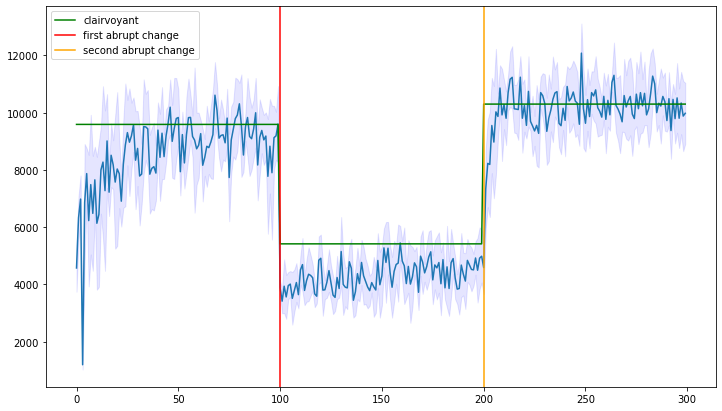

In [7]:
plt.figure(figsize=(12, 7))
mean2 = np.mean(rewards_iterations2, axis=0)
stdev2 = np.std(rewards_iterations2, axis=0)


plt.plot(range(len(mean2)), mean2)
plt.fill_between(range(len(mean2)), (mean2-stdev2), (mean2+stdev2), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c, color="green", label="clairvoyant")
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

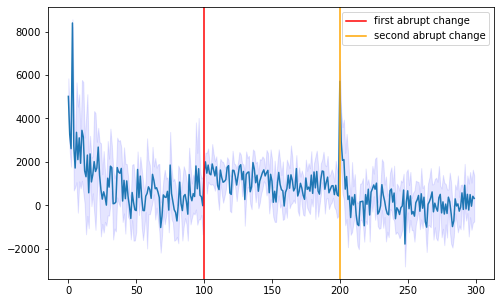

In [8]:
plt.figure(figsize=(8,5))
regret2 = rews_c - rewards_iterations2
mean_regret2 = np.mean(regret2, axis=0)
std_regret2 = np.std(regret2, axis=0)

plt.plot(range(len(mean_regret2)), mean_regret2)
plt.fill_between(range(len(mean_regret2)), (mean_regret2-std_regret2), (mean_regret2+std_regret2), color='b', alpha=.1)
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

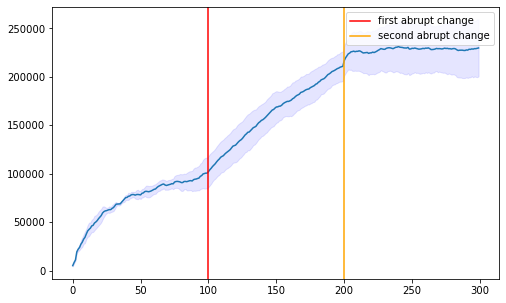

In [9]:
plt.figure(figsize=(8,5))
regret2 = rews_c - rewards_iterations2
cumulative_regret2 = np.cumsum(regret2, axis=1)
cum_reg_mean2 = np.mean(cumulative_regret2, axis=0)
cum_reg_std2 = np.std(cumulative_regret2, axis=0)

plt.plot(range(len(cum_reg_mean2)), cum_reg_mean2)
plt.fill_between(range(len(cum_reg_mean2)), (cum_reg_mean2-cum_reg_std2), (cum_reg_mean2+cum_reg_std2), color='b', alpha=.1)
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

## Comparison between UCBLearnerActive1 and UCBLearnerActive2

cumulative reward comparison

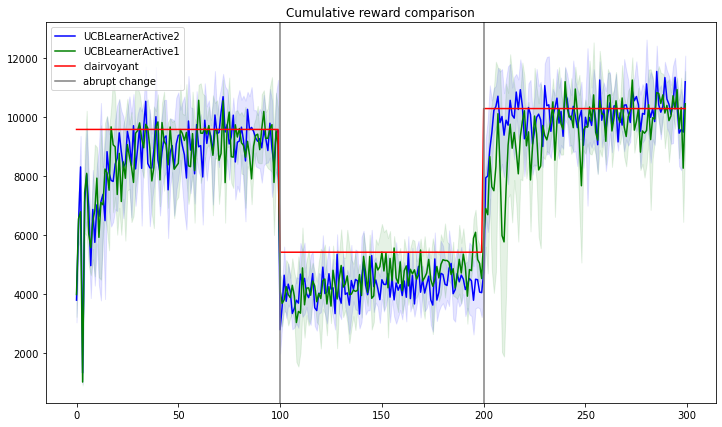

In [15]:
plt.figure(figsize=(12, 7))
plt.plot(range(len(mean2)), mean2, color="blue", label="UCBLearnerActive2")
plt.fill_between(range(len(mean2)), (mean2-stdev2), (mean2+stdev2), color='b', alpha=.1)

plt.plot(range(len(mean1)), mean1, color="green", label="UCBLearnerActive1")
plt.fill_between(range(len(mean1)), (mean1-stdev1), (mean1+stdev1), color="green", alpha=.1)

rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c, color="red", label="clairvoyant")
plt.axvline(x=100, color="grey", label="abrupt change")
plt.axvline(x=200, color="grey")
plt.legend()
plt.title("Cumulative reward comparison")
plt.show()

regret comparison

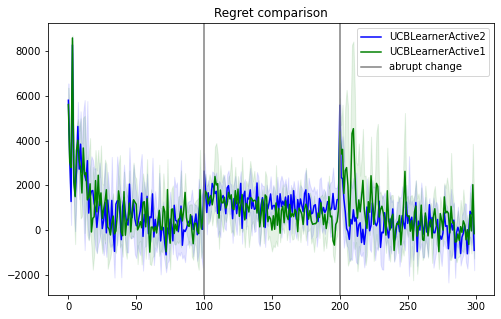

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(len(mean_regret2)), mean_regret2, color="blue", label="UCBLearnerActive2")
plt.fill_between(range(len(mean_regret2)), (mean_regret2-std_regret2), (mean_regret2+std_regret2), color='b', alpha=.1)

plt.plot(range(len(mean_regret1)), mean_regret1, color="green", label="UCBLearnerActive1")
plt.fill_between(range(len(mean_regret1)), (mean_regret1-std_regret1), (mean_regret1+std_regret1), color='green', alpha=.1)

plt.axvline(x=100, color="grey", label="abrupt change")
plt.axvline(x=200, color="grey")
plt.legend()
plt.title("Regret comparison")
plt.show()

cumulative regret comparison

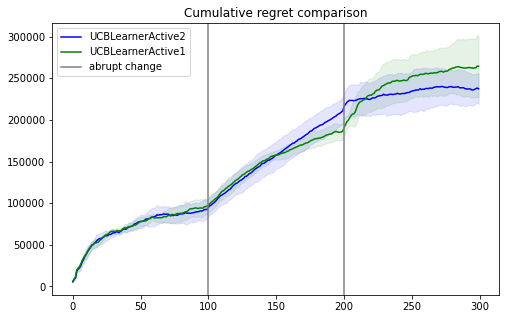

In [17]:
plt.figure(figsize=(8,5))
plt.plot(range(len(cum_reg_mean2)), cum_reg_mean2, color="blue", label="UCBLearnerActive2")
plt.fill_between(range(len(cum_reg_mean2)), (cum_reg_mean2-cum_reg_std2), (cum_reg_mean2+cum_reg_std2), color='b', alpha=.1)

plt.plot(range(len(cum_reg_mean1)), cum_reg_mean1, color="green", label="UCBLearnerActive1")
plt.fill_between(range(len(cum_reg_mean1)), (cum_reg_mean1-cum_reg_std1), (cum_reg_mean1+cum_reg_std1), color='green', alpha=.1)

plt.axvline(x=100, color="grey", label="abrupt change")
plt.axvline(x=200, color="grey")
plt.legend()
plt.title("Cumulative regret comparison")
plt.show()


In [ ]:
n_products

In [ ]:
n_arms

In [ ]:
from random import randrange
array = np.zeros((n_products,n_arms))
for i in range(n_products):
    for j in range(n_arms):
        array[i,j] = randrange(1,10) /10

In [ ]:
array

In [ ]:
randrange(0,1)

In [10]:
cust_json = "customer3_n_s.json"
today_customer = 300
var_cust = 10
p_lambda = 1.0
graph_json = "business_full_graph2_sparse.json"
abrupt_change_interval = 100

arms = settings.prices
environment = EnvironmentNonStationary(cust_json,today_customer,var_cust,p_lambda, graph_json, arms, abrupt_change_interval)
clairvoyant_arms, clairvoyant_reward, exp_c, s= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c)

loading: [                              ] 0.0%
loading: [=                             ] 1.0%
loading: [=                             ] 2.0%
loading: [=                             ] 2.9%
loading: [==                            ] 3.9%
loading: [==                            ] 4.9%
loading: [==                            ] 5.9%
loading: [===                           ] 6.8%
loading: [===                           ] 7.8%
loading: [===                           ] 8.8%
loading: [===                           ] 9.8%
loading: [====                          ] 10.7%
loading: [====                          ] 11.7%
loading: [====                          ] 12.7%
loading: [=====                         ] 13.7%
loading: [=====                         ] 14.6%
loading: [=====                         ] 15.6%
loading: [=====                         ] 16.6%
loading: [======                        ] 17.6%
loading: [======                        ] 18.6%
loading: [======                        ] 19.5%
loa

loading: [=====================         ] 69.3%
loading: [======================        ] 70.3%
loading: [======================        ] 71.3%
loading: [======================        ] 72.3%
loading: [======================        ] 73.2%
loading: [=======================       ] 74.2%
loading: [=======================       ] 75.2%
loading: [=======================       ] 76.2%
loading: [========================      ] 77.1%
loading: [========================      ] 78.1%
loading: [========================      ] 79.1%
loading: [=========================     ] 80.1%
loading: [=========================     ] 81.1%
loading: [=========================     ] 82.0%
loading: [=========================     ] 83.0%
loading: [==========================    ] 84.0%
loading: [==========================    ] 85.0%
loading: [==========================    ] 85.9%
loading: [===========================   ] 86.9%
loading: [===========================   ] 87.9%
loading: [===========================   

## Sliding window

In [11]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution()))

In [12]:
rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb6_learner = UCBLearnerSlidingWindow(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, window_size=50)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        super_arm = ucb6_learner.select_superarm()
        print(super_arm)
        report = environment.round(super_arm)
        ucb6_learner.update(super_arm.copy(), report)
    rewards = ucb6_learner.history_rewards
    rewards_iterations.append(np.array(rewards))
    environment.new_iteration()
rewards_iterations = np.array(rewards_iterations)
rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 1]
[0, 0, 0, 1, 0]
[2, 3, 1, 0, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 0, 2]
[3, 2, 1, 1, 0]
[2, 3, 1, 1, 1]
[2, 1, 3, 1, 2]
loading: [=                             ] 3.3%
[2, 1, 1, 2, 2]
[2, 1, 1, 3, 3]
[2, 1, 2, 1, 2]
[2, 0, 1, 1, 2]
[2, 2, 1, 1, 1]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 1]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 1]
[2, 1, 1, 1, 2]
[2, 1, 1, 0, 2]
[2, 1, 1, 1, 2]
[3, 2, 0, 1, 1]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 0]
[2, 1, 1, 1, 2]
loading: [===                           ] 10.0%
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [====                          ] 13.3%
[2, 1, 1, 1, 2]
[2, 1, 2, 2, 2]
[2, 1, 1, 3, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 

[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 3]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [==========                    ] 33.3%
[2, 1, 1, 1, 2]
[2, 2, 1, 1, 2]
[3, 1, 1, 3, 3]
[2, 2, 2, 2, 2]
[2, 2, 1, 2, 1]
[2, 0, 0, 0, 0]
[2, 1, 1, 0, 2]
[2, 3, 3, 0, 2]
[2, 1, 2, 0, 2]
[2, 2, 1, 0, 2]
loading: [===========                   ] 36.7%
[2, 2, 2, 1, 0]
[2, 1, 3, 1, 2]
[2, 2, 1, 3, 2]
[3, 1, 1, 1, 2]
[2, 0, 3, 1, 2]
[2, 0, 3, 0, 2]
[2, 3, 3, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 2, 1, 1, 2]
loading: [============                  ] 40.0%
[2, 1, 1, 1, 2]
[2, 2, 0, 0, 2]
[2, 3, 2, 0, 2]
[2, 1, 1, 0, 2]
[2, 1, 3, 0, 2]
[2, 1, 1, 3, 2]
[2, 2, 1, 3, 2]
[2, 0, 2, 1, 2]
[2, 2, 1, 0, 2]
[2, 2, 3, 0, 2]
loading: [=============                 ] 43.3%
[2, 1, 1, 3, 2]
[2, 2, 3, 2, 2]
[2, 0, 3, 0, 1]
[2, 1, 3, 1, 2]
[2, 2, 2, 1, 2]
[2, 2, 3, 0, 3]
[2, 1, 3, 1, 3]
[3, 2, 2, 1, 2]
[2, 3, 3, 2, 2]
[2, 2, 0, 0, 2]
loading: [==============

[2, 2, 3, 2, 2]
[3, 2, 3, 0, 2]
[2, 2, 3, 1, 2]
[2, 2, 2, 1, 2]
loading: [===================           ] 63.3%
[2, 2, 3, 1, 2]
[2, 2, 1, 1, 2]
[2, 2, 2, 2, 2]
[2, 3, 3, 3, 2]
[1, 2, 3, 0, 2]
[1, 2, 3, 1, 2]
[1, 2, 0, 0, 2]
[2, 2, 3, 0, 2]
[2, 2, 2, 1, 2]
[2, 0, 3, 0, 2]
loading: [====================          ] 66.7%
[2, 2, 3, 0, 2]
[2, 2, 3, 0, 2]
[2, 2, 3, 2, 2]
[2, 3, 3, 0, 2]
[2, 0, 3, 1, 2]
[2, 2, 3, 1, 3]
[3, 2, 3, 1, 3]
[3, 3, 3, 1, 2]
[3, 2, 3, 1, 1]
[3, 0, 3, 1, 2]
loading: [=====================         ] 70.0%
[3, 2, 3, 1, 2]
[3, 3, 3, 1, 3]
[2, 3, 3, 1, 2]
[2, 3, 3, 1, 2]
[2, 2, 3, 1, 2]
[2, 2, 3, 3, 2]
[2, 3, 3, 1, 1]
[2, 2, 3, 1, 2]
[2, 0, 3, 1, 2]
[3, 2, 3, 1, 2]
loading: [======================        ] 73.3%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 1]
[2, 1, 3, 1, 0]
[2, 1, 3, 1, 0]
[2, 1, 3, 1, 2]
[2, 1, 3, 3, 2]
[2, 1, 3, 2, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
loading: [=======================       ] 76.7%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 0

[2, 1, 3, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
loading: [============================= ] 96.7%
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 3]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 2, 1, 2]
[2, 1, 3, 1, 2]
[2, 1, 3, 1, 2]
Iteration # 5
loading: [                              ] 0.0%
[3, 3, 3, 3, 3]
[2, 2, 2, 2, 2]
[1, 1, 1, 1, 1]
[0, 0, 0, 1, 0]
[2, 3, 1, 0, 2]
[2, 1, 1, 1, 1]
[2, 2, 3, 0, 2]
[2, 1, 2, 1, 0]
[2, 3, 1, 1, 2]
[3, 1, 1, 1, 3]
loading: [=                             ] 3.3%
[2, 1, 1, 1, 2]
[2, 2, 1, 2, 1]
[2, 1, 1, 1, 2]
[2, 3, 1, 1, 2]
[2, 1, 2, 1, 2]
[2, 0, 0, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 3, 2]
[2, 2, 1, 1, 2]
[2, 1, 1, 1, 2]
loading: [==                            ] 6.7%
[2, 3, 1, 1, 1]
[2, 1, 2, 0, 2]
[2, 1, 1, 1, 1]
[2, 1, 1, 1, 1]
[2, 1, 3, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 2]
[2, 1, 1, 1, 

(5, 300)

In [ ]:
ucb6_learner.reports

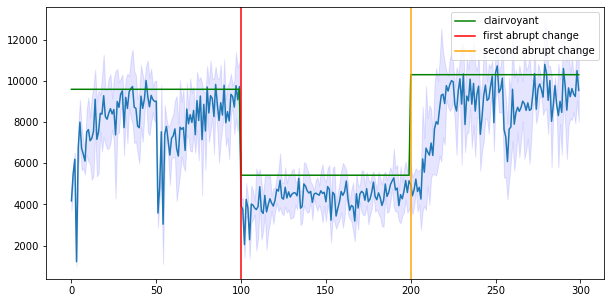

In [13]:
plt.figure(figsize=(10, 5))
mean = np.mean(rewards_iterations, axis=0)
stdev = np.std(rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)
rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c, color="green", label="clairvoyant")
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

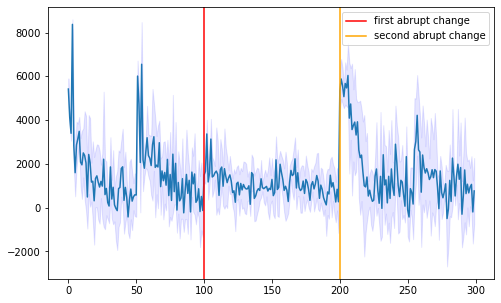

In [14]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
mean_regret = np.mean(regret, axis=0)
std_regret = np.std(regret, axis=0)
plt.plot(range(len(mean_regret)), mean_regret)
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

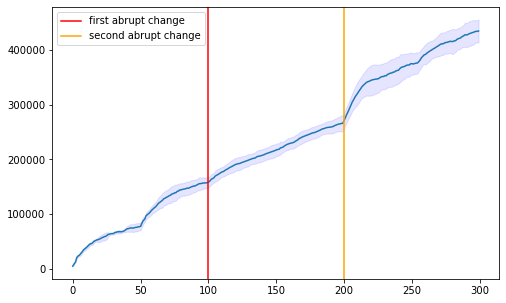

In [15]:
plt.figure(figsize=(8,5))
regret = rews_c - rewards_iterations 
cumulative_regret = np.cumsum(regret, axis=1)
cum_reg_mean = np.mean(cumulative_regret, axis=0)
cum_reg_std = np.std(cumulative_regret, axis=0)

plt.plot(range(len(cum_reg_mean)), cum_reg_mean)
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)
plt.axvline(x=100, color="red", label="first abrupt change")
plt.axvline(x=200, color="orange", label="second abrupt change")
plt.legend()
plt.show()

## Comparison between sliding window and Active learner

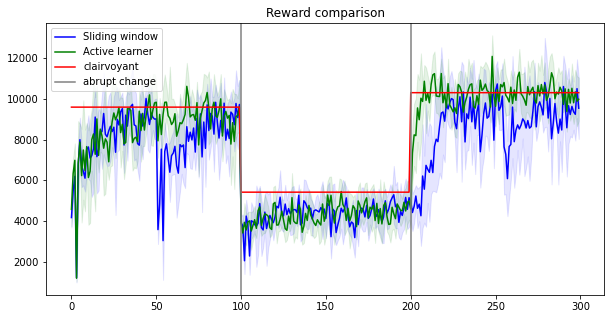

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(mean)), mean, color="blue", label="Sliding window")
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='blue', alpha=.1)

plt.plot(range(len(mean2)), mean2, color="green", label="Active learner")
plt.fill_between(range(len(mean2)), (mean2-stdev2), (mean2+stdev2), color='green', alpha=.1)

rews_c = [clairvoyant_reward[0]] * abrupt_change_interval + [clairvoyant_reward[1]] * abrupt_change_interval + [clairvoyant_reward[2]] * abrupt_change_interval
plt.plot([_ for _ in range(len(rews_c))], rews_c, color="red", label="clairvoyant")

plt.axvline(x=100, color="grey", label="abrupt change")
plt.axvline(x=200, color="grey")
plt.legend()
plt.title("Reward comparison")
plt.show()

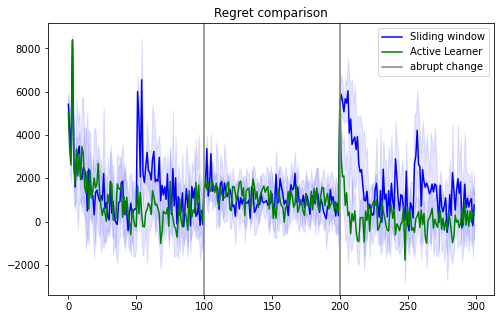

In [18]:
plt.figure(figsize=(8,5))

plt.plot(range(len(mean_regret)), mean_regret, color="blue", label="Sliding window")
plt.fill_between(range(len(mean_regret)), (mean_regret-std_regret), (mean_regret+std_regret), color='b', alpha=.1)

plt.plot(range(len(mean_regret2)), mean_regret2, color="green", label="Active Learner")
plt.fill_between(range(len(mean_regret2)), (mean_regret2-std_regret2), (mean_regret2+std_regret2), color='b', alpha=.1)

plt.axvline(x=100, color="grey", label="abrupt change")
plt.axvline(x=200, color="grey")
plt.legend()
plt.title("Regret comparison")
plt.show()

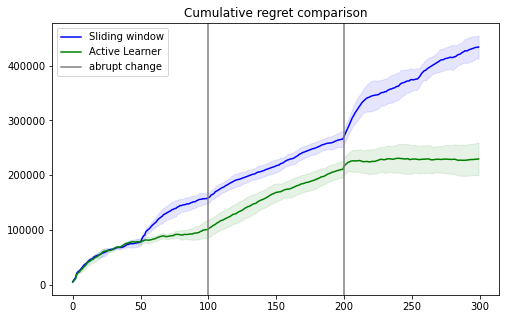

In [21]:
plt.figure(figsize=(8,5))

plt.plot(range(len(cum_reg_mean)), cum_reg_mean, color="blue", label="Sliding window")
plt.fill_between(range(len(cum_reg_mean)), (cum_reg_mean-cum_reg_std), (cum_reg_mean+cum_reg_std), color='b', alpha=.1)

plt.plot(range(len(cum_reg_mean2)), cum_reg_mean2, color="green", label="Active Learner")
plt.fill_between(range(len(cum_reg_mean2)), (cum_reg_mean2-cum_reg_std2), (cum_reg_mean2+cum_reg_std2), color='green', alpha=.1)

plt.axvline(x=100, color="grey", label="abrupt change")
plt.axvline(x=200, color="grey")
plt.legend()
plt.title("Cumulative regret comparison")
plt.show()

In [ ]:
#plt.savefig('foo.pdf')